# Aims

- Build a class that can perform basic multi variate time series data analytics, and find the linear relationships between different columns

In [1]:
# To call functions outside of this folder
import sys  
sys.path.insert(0, '..')

In [2]:
import pandas as pd

import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels
import matplotlib.pyplot as plt

import seaborn as sns

from src.analytics.ts_analytics import Ts_Analytics

analytics = Ts_Analytics()

---
# Load data

In [3]:
data = pd.read_csv('../data/multivariate/blow_mold_preprocessed.csv')

# data = data.drop(columns=['global_proce_of_rubber', 'ppi_nonpackaging_plastic'])

analytics.analyse(data)

In [4]:
data

datetime     y  gas_regm  m_coil_brent_eu  ppi_plastic_resins  \
0    2000-01-31  41.0     1.289            25.51             139.400   
1    2000-02-29  41.0     1.377            27.78             141.700   
2    2000-03-31  45.0     1.516            27.49             146.300   
3    2000-04-30  47.0     1.465            22.76             151.400   
4    2000-05-31  47.0     1.487            27.74             155.600   
..          ...   ...       ...              ...                 ...   
271  2022-08-31  93.0     3.975           100.45             329.278   
272  2022-09-30  90.0     3.700            89.76             326.451   
273  2022-10-31  90.0     3.815            93.33             316.901   
274  2022-11-30  90.0     3.685            91.42             300.185   
275  2022-12-31  90.0     3.210            80.92             291.825   

     global_proce_of_rubber  ppi_nonpackaging_plastic  
0                 29.207387                   106.300  
1                 33.391099                   105.600  
2                 30.941913                   106.100  
3                 31.930148                   106.900  
4                 31.201702                   106.300  
..                      ...                       ...  
271               73.304558                   303.837  
272               66.956499                   308.976  
273               68.535729                   312.788  
274               65.265834                   307.226  
275               65.265834                   307.226  

[276 rows x 7 columns]

---

# What is the autocorrelation of the target column?

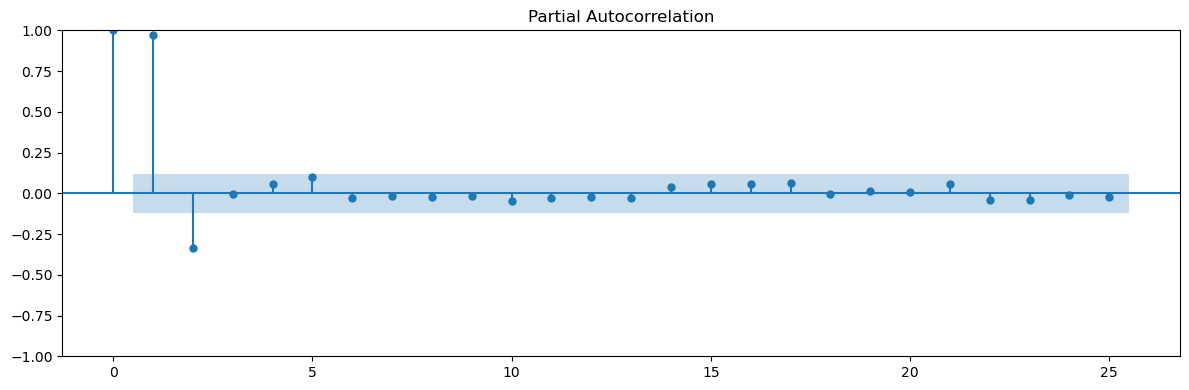

In [5]:
analytics.plot_target_pacf()
plt.show()

---

# Set auto correlation of target column
- This is a data transformation process, not at this step

In [6]:
# analytics.set_ar('y', 2)
# analytics.create_target_lag_columns()

In [7]:
# analytics.ts_df.ffill()

In [8]:
analytics.ts_df.shape

(276, 6)

In [9]:
analytics.ts_df.head()

y  gas_regm  m_coil_brent_eu  ppi_plastic_resins  \
datetime                                                          
2000-01-31  41.0     1.289            25.51               139.4   
2000-02-29  41.0     1.377            27.78               141.7   
2000-03-31  45.0     1.516            27.49               146.3   
2000-04-30  47.0     1.465            22.76               151.4   
2000-05-31  47.0     1.487            27.74               155.6   

            global_proce_of_rubber  ppi_nonpackaging_plastic  
datetime                                                      
2000-01-31               29.207387                     106.3  
2000-02-29               33.391099                     105.6  
2000-03-31               30.941913                     106.1  
2000-04-30               31.930148                     106.9  
2000-05-31               31.201702                     106.3

---

# What are the correlation across columns?

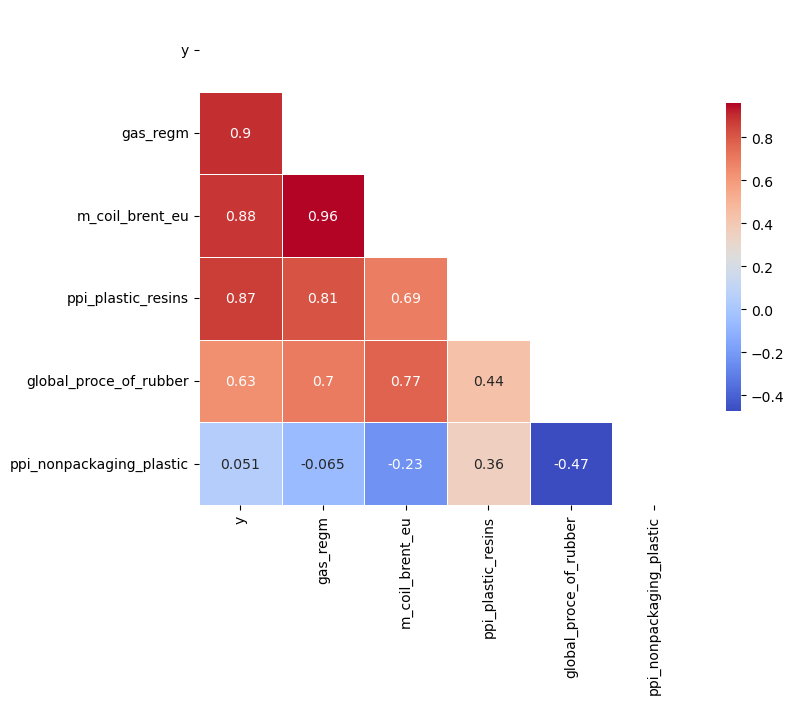

In [10]:
analytics.plot_correlation()
plt.show()

---

# What is the distribution of each column?

- They are not normal distributed, however, data with strong correlation shows similar distribution

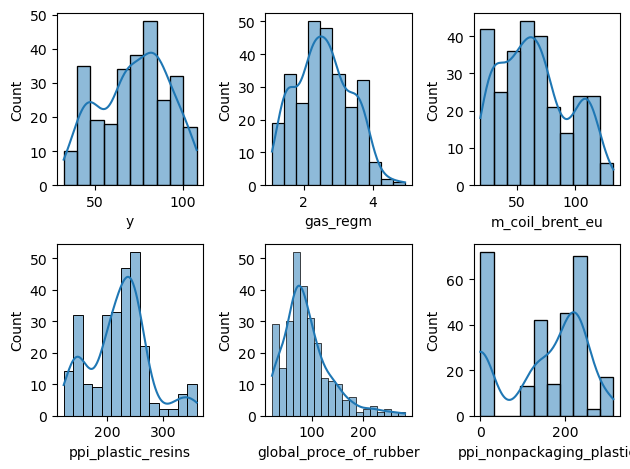

In [11]:
analytics.plot_distributions()
plt.show()

---
# What is the initial multi regression model?
- P > |t| column says the chance of a model that built without this variable is same as the model built with this variable
- If the P value is big, means the variable have minor affect on the model (because the model likely will not change even when remove this column)

In [12]:
analytics.train_multiple_regression()

train_multiple_regression


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     530.2
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          2.55e-137
Time:                        00:32:56   Log-Likelihood:                -881.16
No. Observations:                 276   AIC:                             1774.
Df Residuals:                     270   BIC:                             1796.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.2549      1.864      6.037      0.000       7.584      14.925
gas_regm                    -8.4979      2.283     -3.722      0.000     -12.993      -4.003
m_coil_brent_eu              0.5358      0.055      9.727      0.000       0.427       0.644
ppi_plastic_resins           0.2139      0.017     12.627      0.000       0.181       0.247
global_proce_of_rubber      -0.0004      0.014     -0.025      0.980      -0.029       0.028
ppi_nonpackaging_plastic     0.0027      0.006      0.421      0.674      -0.010       0.015
==============================================================================
Omnibus:                       22.574   Durbin-Watson:                   0.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.291
Skew:                          -0.336   Prob(JB):                     3.63e-13
Kurtosis:                       5.129   Cond. No.                     2.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---
# What is the effect size of each columns? How to perform ANOVA ?

---
# What is the ordinal least squared regression model formula? 

In [13]:
analytics.multiple_regression_formula

'11.25487003334793 + gas_regm * -8.498 + m_coil_brent_eu * 0.536 + ppi_plastic_resins * 0.214 + global_proce_of_rubber * -0.0 + ppi_nonpackaging_plastic * 0.003'

---
# What is the coefficient of determination (r-squared) for each independent variable?
- Meaning, in what percentage each independent variable can explain the target columns?

/Users/qiaozhang/Desktop/sentient-dev/snr_demand-forecasting/notebooks/../src/analytics/ts_analytics.py:173: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  beta_plot.set_xticklabels(beta_plot.get_xticklabels(), rotation=45)


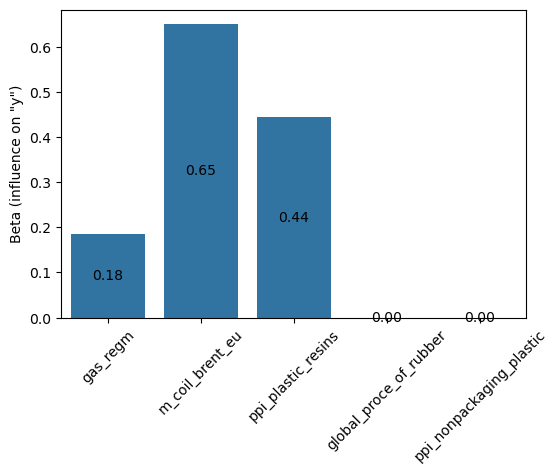

In [14]:
analytics.plot_beta()
plt.show()

---
# How to measure the Shared variance (multicollinearity) between independent variables? 

---

# What is the seasonality of the target column?

- Trend is not presenting with the default seasonality period
- Not recommended to use statistical models, because the seasonality is not strong
- However, because of the strong auto currelation, we can build a model that predict next 2 values relatively accurate. 

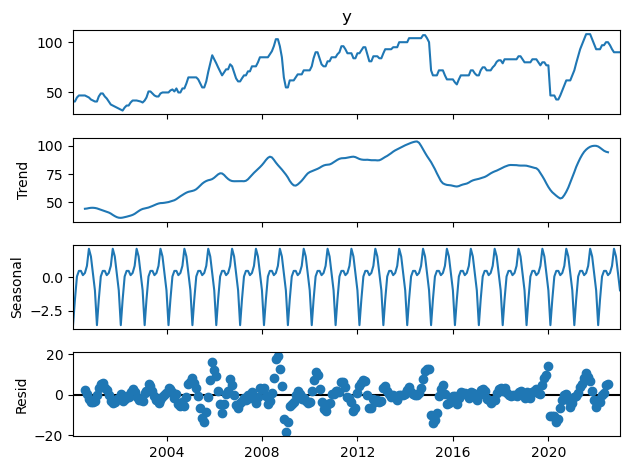

In [15]:
analytics.plot_target_seasonality().plot()
plt.show()

---

# What is the default seasonality period and frequency for the provided data?

In [16]:
analytics.period

12

In [17]:
analytics.freq

'M'

---

# Can more seasonality been extracted from the data?

In [18]:
analytics.set_period([12])

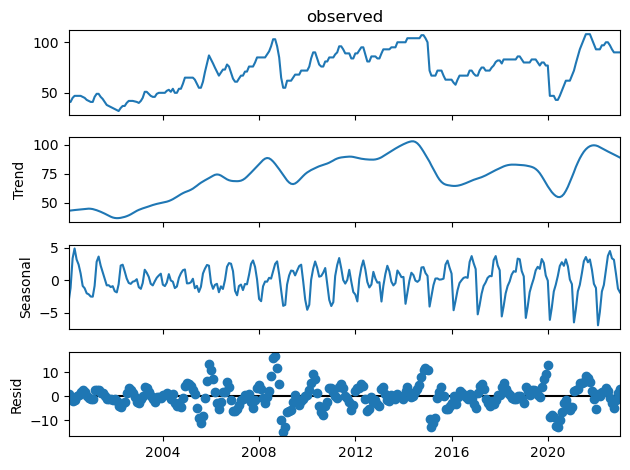

In [19]:
analytics.plot_target_seasonality().plot()
plt.show()